In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('car.csv',usecols=[3,4,5])
df.columns

Index(['year', 'Price', 'kms_driven'], dtype='object')

In [42]:
df.head()

,year,Price,kms_driven
0,20070101,80000,45000
1,20060101,425000,40
2,20140101,325000,28000
3,20140101,575000,36000
4,20120101,175000,41000


<Axes: xlabel='Price', ylabel='Density'>

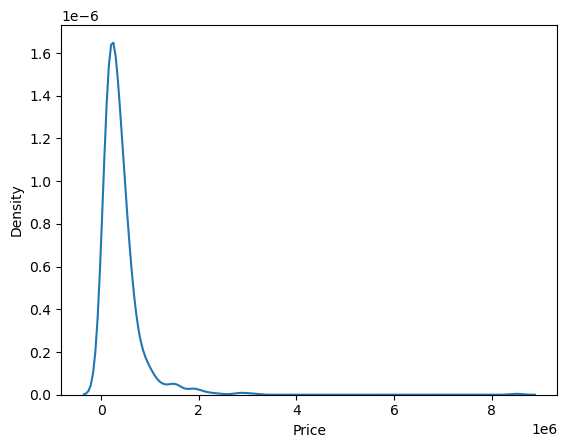

In [43]:

sns.kdeplot(df['Price'])

<Axes: xlabel='kms_driven', ylabel='Density'>

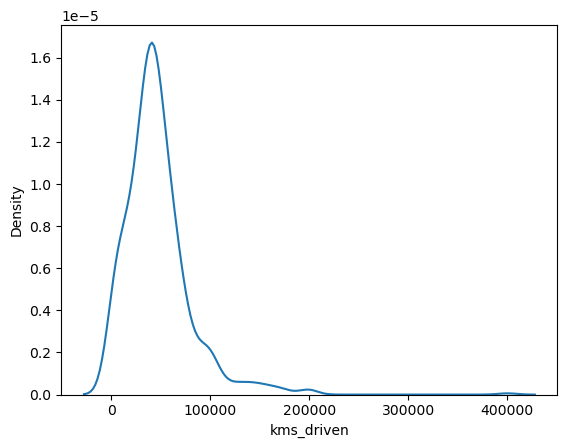

In [44]:
sns.kdeplot(df['kms_driven'])

<Axes: xlabel='Price', ylabel='kms_driven'>

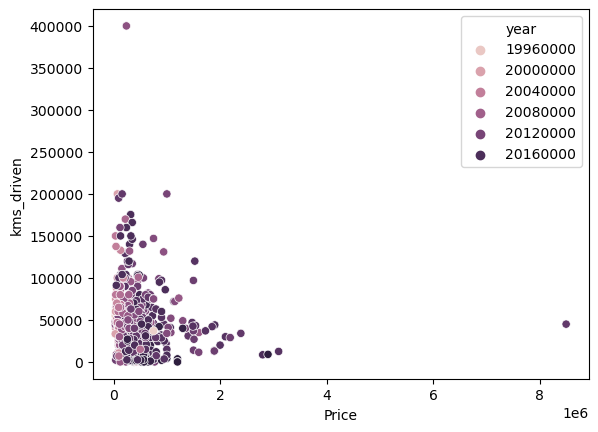

In [45]:
sns.scatterplot(x='Price',y='kms_driven',hue='year',data=df)

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('year', axis=1),
                                                    df['year'],test_size=0.2,random_state=0)
X_train.shape,X_test.shape

((579, 2), (145, 2))

In [47]:
from sklearn.preprocessing import MinMaxScaler
mean = MinMaxScaler()
mean.fit(X_train)

X_train_scaled=mean.transform(X_train)
X_train_scaled=mean.transform(X_train)

In [48]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_train_scaled, columns=X_test.columns)

In [49]:
np.round(X_train.describe(), 1)

,Price,kms_driven
count,579.0,579.0
mean,410729.4,46585.1
std,512878.5,35522.4
min,30000.0,0.0
25%,162500.0,27000.0
50%,289999.0,41000.0
75%,489999.0,57000.0
max,8500003.0,400000.0


In [50]:
np.round(X_train_scaled.describe(), 1)

,Price,kms_driven
count,579.0,579.0
mean,0.0,0.1
std,0.1,0.1
min,0.0,0.0
25%,0.0,0.1
50%,0.0,0.1
75%,0.1,0.1
max,1.0,1.0


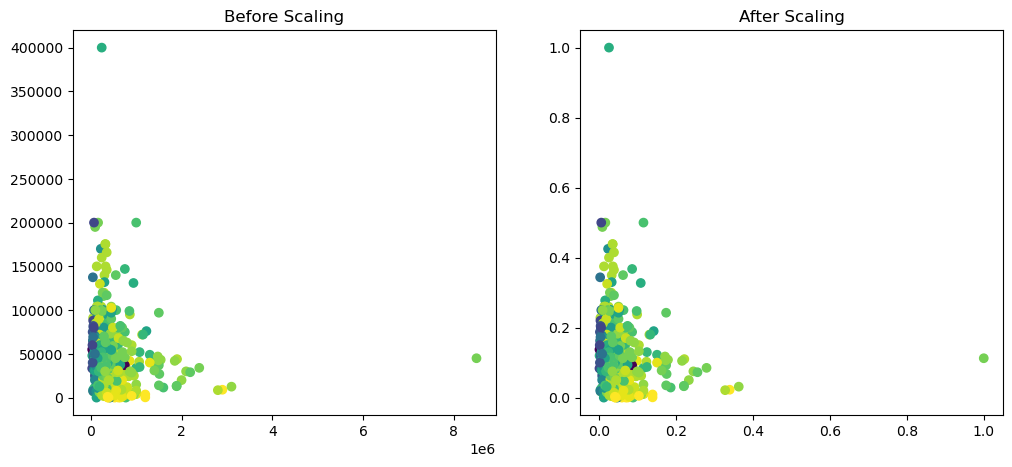

In [51]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Price'], X_train['kms_driven'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Price'], X_train_scaled['kms_driven'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

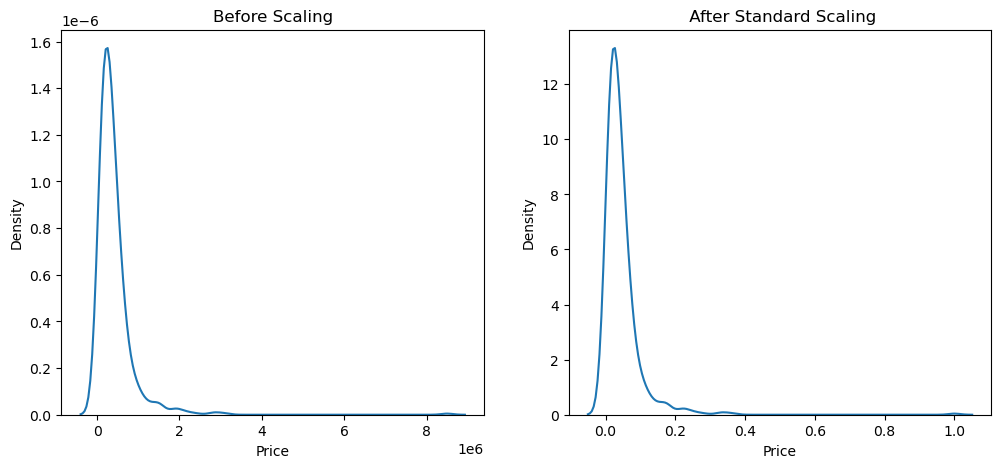

In [53]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Price'], ax=ax1)

# after scaling
ax2.set_title(' After Standard Scaling')
sns.kdeplot(X_train_scaled['Price'], ax=ax2)
plt.show()

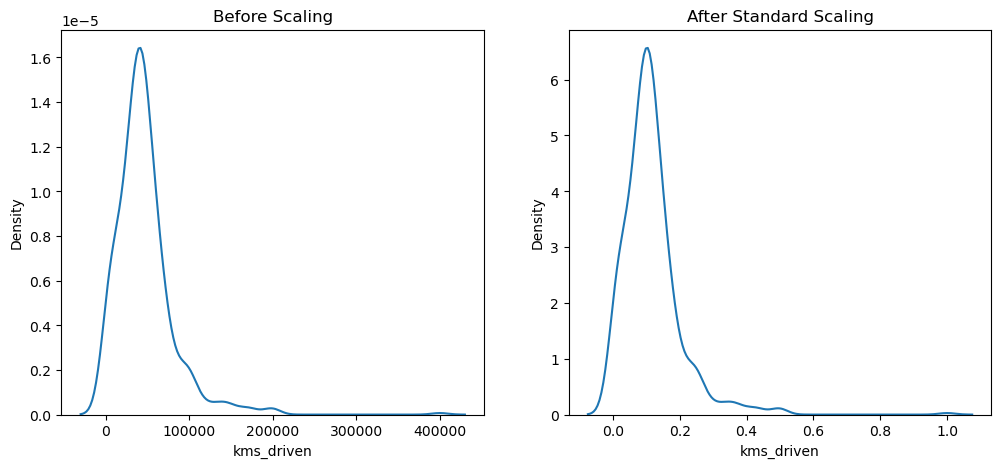

In [54]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['kms_driven'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['kms_driven'], ax=ax2)
plt.show()